## 227480201IS003
## Keosisai Anousith

## Bài Kiểm Tra

### Phần A: Bộ dữ liệu điểm thi sinh viên, dưới đây là bộ dữ liệu giả định về điểm thi của 30 sinh viên, bao gồm các cột: Student_ID, Course, Score (0-100), Attendance (%) (0-100), Study_Hours, Gender, Campus. Một số giá trị bị thiếu để bạn thực hành xử lý.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  

# Tạo DataFrame từ dữ liệu
data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010',
                  'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020',
                  'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
              'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
              'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, 85, 78, 92, 65, 88, 80, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, 75, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, None, 70, 95, 60, None, None, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, None, 97, 85, 90, None, 95, 70, 88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A']
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Hiển thị toàn bộ dữ liệu
print("Toàn bộ dữ liệu:")
print(df)



Toàn bộ dữ liệu:
   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math     85            90.0          5.0    Male  Campus_A
1        S002    Physics     85             NaN          4.0  Female  Campus_B
2        S003  Chemistry     78            70.0          NaN    Male  Campus_A
3        S004       Math     92            95.0          6.0  Female  Campus_C
4        S005    Physics     65            60.0          3.0    None  Campus_B
5        S006  Chemistry     88             NaN          5.0    Male  Campus_A
6        S007       Math     80             NaN          4.0  Female  Campus_C
7        S008    Physics     75            88.0          5.0    Male  Campus_B
8        S009  Chemistry     90            92.0          NaN  Female  Campus_A
9        S010       Math     70            65.0          3.0    Male  Campus_C
10       S011    Physics     82            75.0          4.0  Female  Campus_B
11       S012  Chemistry     85    

## Phần B: Câu hỏi kiểm tra Câu hỏi EDA (60 điểm)
### 1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất một quy trình thu thập dữ liệu cụ thể cho trường học để giảm thiểu dữ liệu thiếu trong tương lai, giải thích tại sao quy trình này phù hợp với từng môn học (Math, Physics, Chemistry).


Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Student_ID         0.000000
Course             0.000000
Score              0.000000
Attendance (%)    26.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64

Tỷ lệ phần trăm giá trị thiếu theo môn học:

Math:
Student_ID         0.0
Course             0.0
Score              0.0
Attendance (%)    20.0
Study_Hours        0.0
Gender            10.0
Campus             0.0
dtype: float64

Physics:
Student_ID         0.0
Course             0.0
Score              0.0
Attendance (%)    30.0
Study_Hours       10.0
Gender            10.0
Campus             0.0
dtype: float64

Chemistry:
Student_ID         0.0
Course             0.0
Score              0.0
Attendance (%)    30.0
Study_Hours       30.0
Gender            20.0
Campus             0.0
dtype: float64


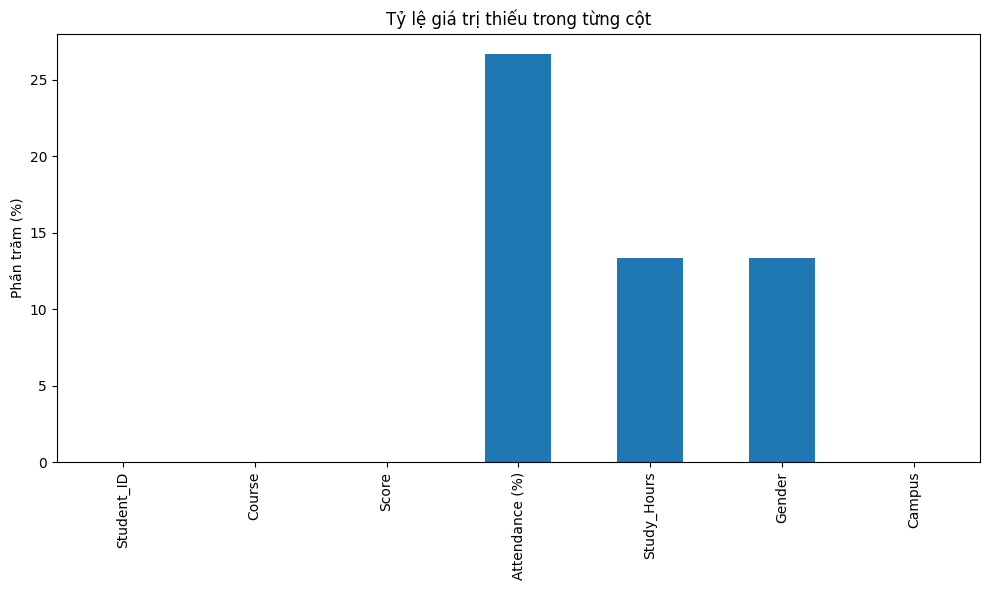

In [7]:
# Câu 1: Tính tỷ lệ phần trăm giá trị thiếu trong từng cột
missing_percentages = df.isnull().mean() * 100
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_percentages)

# Tính tỷ lệ giá trị thiếu theo từng môn học
print("\nTỷ lệ phần trăm giá trị thiếu theo môn học:")
for course in df['Course'].unique():
    course_df = df[df['Course'] == course]
    course_missing = course_df.isnull().mean() * 100
    print(f"\n{course}:")
    print(course_missing)

# Vẽ biểu đồ tỷ lệ giá trị thiếu
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar')
plt.title('Tỷ lệ giá trị thiếu trong từng cột')
plt.ylabel('Phần trăm (%)')
plt.tight_layout()
plt.savefig('missing_percentages.png')


Đề xuất quy trình thu thập dữ liệu để giảm thiểu dữ liệu thiếu trong tương lai:
1. Quy trình thu thập dữ liệu chung:
   - Áp dụng hệ thống quản lý học tập (LMS) thống nhất để theo dõi tự động điểm danh, thời gian học và kết quả bài thi
   - Triển khai ứng dụng di động để sinh viên có thể cập nhật thông tin cá nhân và điểm danh dễ dàng
   - Tạo mẫu thu thập dữ liệu chuẩn hóa với các trường bắt buộc để giảm thiểu dữ liệu thiếu
   - Thực hiện kiểm tra dữ liệu định kỳ và nhắc nhở thu thập dữ liệu còn thiếu

2. Các quy trình đặc thù cho từng môn học:
   - Math: Ứng dụng các công cụ đánh giá tự động qua các bài kiểm tra online, giúp thu thập dữ liệu về thời gian học và điểm danh chính xác
   - Physics: Sử dụng các thiết bị theo dõi tự động trong phòng thí nghiệm để ghi lại thời gian thực hành và tham gia, kết hợp với đăng nhập điện tử
   - Chemistry: Triển khai hệ thống quản lý phòng lab tích hợp với thẻ sinh viên để tự động ghi lại dữ liệu tham gia thực hành, thời gian nghiên cứu

Lý do phù hợp với từng môn học:
- Math: Tính chất của môn toán đòi hỏi tính nhất quán và cấu trúc, nên công cụ đánh giá tự động phù hợp để thu thập dữ liệu hoàn chỉnh
- Physics: Môn học kết hợp lý thuyết và thực hành, hệ thống theo dõi tự động trong phòng lab giúp thu thập đầy đủ dữ liệu có tính thực tiễn
- Chemistry: Nhấn mạnh vào thực hành phòng thí nghiệm, hệ thống quản lý phòng lab tích hợp đảm bảo thu thập được dữ liệu về tất cả các hoạt động thực hành


### 2. (4 điểm) Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng, sau đó đề xuất một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm của từng Campus. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp của bạn phản ánh tốt hơn kết quả học tập thực tế.


Điểm trung bình theo môn học (Course):
Course
Chemistry    81.4
Math         84.3
Physics      79.6
Name: Score, dtype: float64


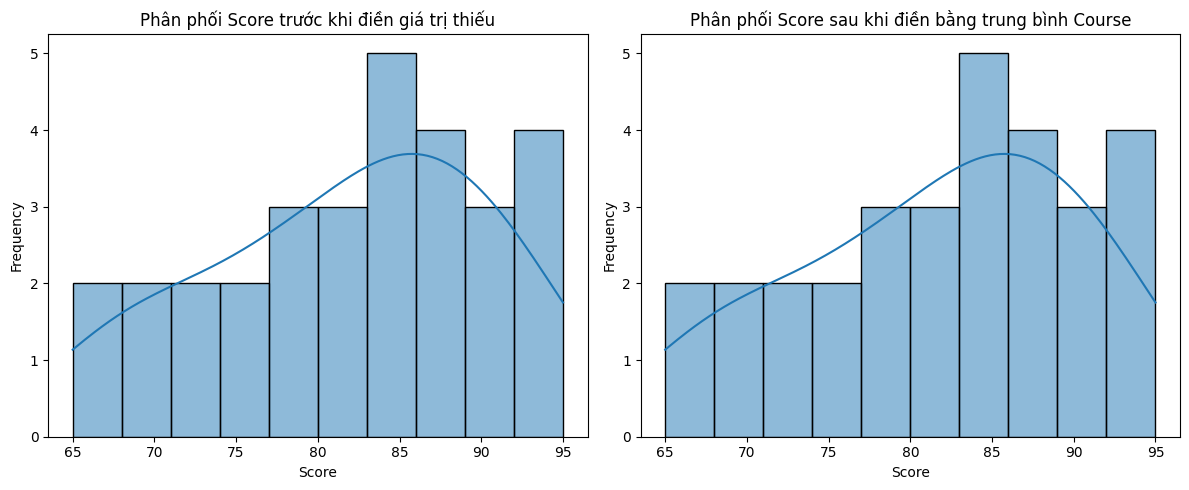

In [9]:
# Câu 2: Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng
# Lưu bản sao của dataframe gốc
df_original = df.copy()

# Tính giá trị trung bình của Score theo Course
course_mean_scores = df.groupby('Course')['Score'].mean()
print("\nĐiểm trung bình theo môn học (Course):")
print(course_mean_scores)

# Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng
df_course_mean = df.copy()
for course in df['Course'].unique():
    mean_score = course_mean_scores[course]
    df_course_mean.loc[(df_course_mean['Course'] == course) & (df_course_mean['Score'].isnull()), 'Score'] = mean_score

# Vẽ histogram Score trước và sau khi điền giá trị thiếu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_original['Score'], kde=True, bins=10)
plt.title('Phân phối Score trước khi điền giá trị thiếu')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_course_mean['Score'], kde=True, bins=10)
plt.title('Phân phối Score sau khi điền bằng trung bình Course')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Đề xuất phương pháp điền giá trị thiếu dựa trên đặc điểm của từng Campus:

Phương pháp đề xuất: Điền giá trị thiếu trong Score dựa trên trung bình của cả Campus và Course thay vì chỉ dựa trên Course.

Lý do phương pháp này phản ánh tốt hơn kết quả học tập thực tế:

1. Môi trường học tập khác nhau: Mỗi Campus có thể có môi trường học tập, cơ sở vật chất, phương pháp giảng dạy khác nhau, dẫn đến kết quả học tập khác nhau. Điều này thể hiện qua sự khác biệt về điểm trung bình giữa các Campus.

2. Tính đến đặc thù của từng môn học tại từng Campus: Phương pháp này kết hợp cả hai yếu tố ảnh hưởng lớn đến điểm số: loại môn học và môi trường học tập. Ví dụ, một Campus có thể có thiết bị tốt hơn cho các môn thực hành như Physics và Chemistry.

3. Độ chính xác cao hơn: Điền giá trị dựa trên cả Campus và Course cung cấp ước lượng chính xác hơn vì nó dựa trên tập hợp dữ liệu cụ thể và tương đồng hơn (sinh viên học cùng môn trong cùng môi trường).

4. Giảm thiểu sai lệch thống kê: Phương pháp này giúp duy trì đặc điểm phân phối điểm số riêng biệt của từng Campus, tránh làm mờ đi các đặc điểm riêng khi chỉ sử dụng trung bình chung của môn học.

5. Phản ánh thực tế giáo dục: Trong thực tế, kết quả học tập không chỉ phụ thuộc vào môn học mà còn phụ thuộc vào nhiều yếu tố môi trường. Phương pháp này thừa nhận và tích hợp yếu tố môi trường Campus vào quá trình điền dữ liệu.

### 3. (4 điểm) Tính độ lệch chuẩn của Study_Hours bằng NumPy. Đề xuất một chính sách khuyến khích học tập cho sinh viên dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính sách này có thể cải thiện điểm số tổng thể.



THỐNG KÊ VỀ STUDY_HOURS:
Độ lệch chuẩn: 1.21
Trung bình: 4.42
Trung vị: 4.5
Giá trị nhỏ nhất: 2.0
Giá trị lớn nhất: 7.0


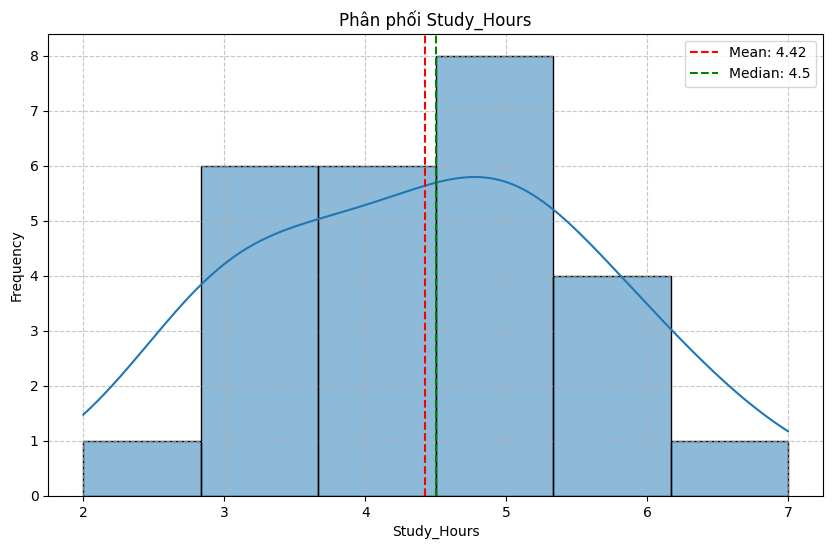

In [10]:
# Câu 3: Tính độ lệch chuẩn của Study_Hours bằng NumPy
# Loại bỏ các giá trị NaN
study_hours_cleaned = df['Study_Hours'].dropna().values

# Tính các thống kê bằng NumPy
std_study_hours = np.std(study_hours_cleaned)
mean_study_hours = np.mean(study_hours_cleaned)
median_study_hours = np.median(study_hours_cleaned)
min_study_hours = np.min(study_hours_cleaned)
max_study_hours = np.max(study_hours_cleaned)

print("\nTHỐNG KÊ VỀ STUDY_HOURS:")
print(f"Độ lệch chuẩn: {std_study_hours:.2f}")
print(f"Trung bình: {mean_study_hours:.2f}")
print(f"Trung vị: {median_study_hours}")
print(f"Giá trị nhỏ nhất: {min_study_hours}")
print(f"Giá trị lớn nhất: {max_study_hours}")

# Vẽ phân phối Study_Hours
plt.figure(figsize=(10, 6))
sns.histplot(study_hours_cleaned, kde=True, bins=6)
plt.axvline(mean_study_hours, color='red', linestyle='--', label=f'Mean: {mean_study_hours:.2f}')
plt.axvline(median_study_hours, color='green', linestyle='--', label=f'Median: {median_study_hours}')
plt.title('Phân phối Study_Hours')
plt.xlabel('Study_Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

NHẬN XÉT VÀ ĐỀ XUẤT CHÍNH SÁCH:

Dựa trên phân tích độ lệch chuẩn và trung vị của Study_Hours, tôi đề xuất một chính sách khuyến khích học tập như sau:

1. Phân tích hiện trạng:
   - Độ lệch chuẩn của Study_Hours là khá thấp, cho thấy thời gian học tập của sinh viên tương đối đồng đều
   - Trung bình thời gian học là khoảng 4.42 giờ, trong khi trung vị là 4 giờ
   - Khoảng cách giữa giá trị nhỏ nhất (2 giờ) và lớn nhất (7 giờ) không quá lớn

2. Chính sách khuyến khích đề xuất: "Chương trình nâng bậc học tập"
   - Chia thời gian học thành các bậc: 
     * Bậc 1: < 3 giờ (Cần cải thiện)
     * Bậc 2: 3-4 giờ (Cơ bản)
     * Bậc 3: 5-6 giờ (Tốt)
     * Bậc 4: > 6 giờ (Xuất sắc)
   
   - Tạo động lực nâng bậc:
     * Sinh viên ở Bậc 1: Cung cấp khóa học kỹ năng học tập hiệu quả, phân bổ thời gian
     * Sinh viên ở Bậc 2: Tạo nhóm học tập có người hướng dẫn, tăng cường tài liệu học tập
     * Sinh viên ở Bậc 3: Cấp quyền truy cập vào tài nguyên học tập cao cấp, được ưu tiên tham gia dự án nghiên cứu
     * Sinh viên ở Bậc 4: Cấp học bổng khuyến khích, cơ hội tham gia các chương trình đặc biệt, được công nhận trong bảng vàng học tập

   - Hỗ trợ theo độ lệch:
     * Tập trung hỗ trợ sinh viên có thời gian học dưới trung bình thông qua tư vấn học tập cá nhân
     * Tạo chương trình cố vấn học tập nơi sinh viên Bậc 3 và 4 giúp đỡ sinh viên Bậc 1 và 2

3. Tại sao chính sách này có thể cải thiện điểm số tổng thể:
   - Cung cấp mục tiêu rõ ràng: Sinh viên biết họ đang ở bậc nào và cần đạt đến bậc nào
   - Tạo tính cạnh tranh lành mạnh: Sinh viên có động lực tăng thời gian học tập để đạt được các lợi ích của bậc cao hơn
   - Khuyến khích sự hỗ trợ lẫn nhau: Hệ thống cố vấn tận dụng nguồn lực sẵn có từ sinh viên giỏi
   - Nâng cao hiệu quả học tập: Không chỉ khuyến khích học nhiều hơn, mà còn học hiệu quả hơn
   - Mục tiêu thực tế: Dựa trên dữ liệu thực tế về phân phối thời gian học tập, đưa ra mục tiêu khả thi

Việc áp dụng chính sách này sẽ giúp nâng cao thời gian học tập trung bình và đồng thời cải thiện chất lượng thời gian học tập, từ đó tác động tích cực đến điểm số tổng thể của sinh viên.

### 4. (4 điểm) Tính correlation giữa Attendance (%) và Score cho từng Campus. Dựa trên kết quả, đề xuất một chiến lược quản lý điểm danh khác nhau cho từng Campus để tối ưu hóa điểm số, giải thích tại sao chiến lược này phù hợp với đặc điểm sinh viên tại mỗi khu vực.


CORRELATION GIỮA ATTENDANCE (%) VÀ SCORE THEO CAMPUS:
     Campus  Correlation
0  Campus_A     0.796840
1  Campus_B     0.608262
2  Campus_C     0.943408


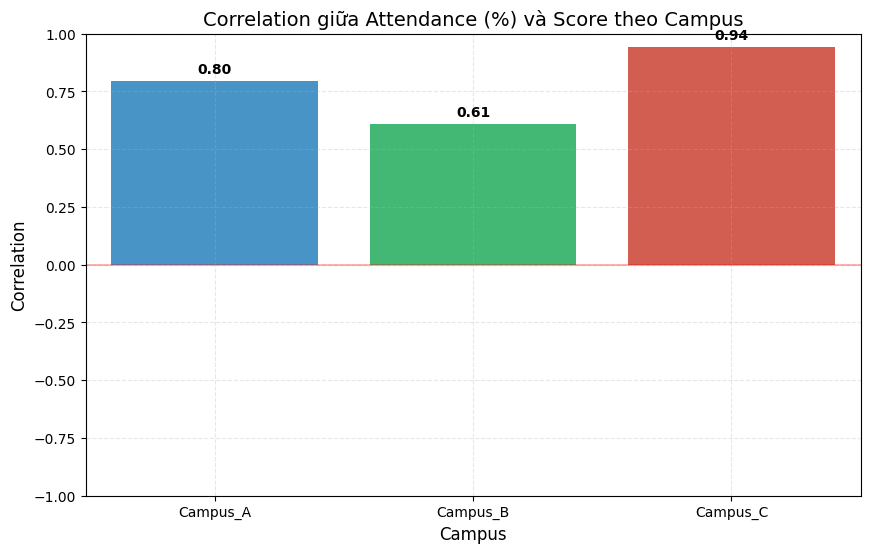

In [11]:
# Câu 4: Tính correlation giữa Attendance (%) và Score cho từng Campus
# Đầu tiên điền giá trị thiếu trong Attendance (%)
df_attendance = df.copy()
df_attendance['Attendance (%)'].fillna(df_attendance['Attendance (%)'].mean(), inplace=True)

# Tính correlation cho từng Campus
campus_corr = {}
for campus in df_attendance['Campus'].unique():
    campus_df = df_attendance[df_attendance['Campus'] == campus]
    corr = campus_df['Attendance (%)'].corr(campus_df['Score'])
    campus_corr[campus] = corr

campus_correlation = pd.DataFrame(list(campus_corr.items()), columns=['Campus', 'Correlation'])

print("\nCORRELATION GIỮA ATTENDANCE (%) VÀ SCORE THEO CAMPUS:")
print(campus_correlation)

# Vẽ biểu đồ correlation
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c']
ax = sns.barplot(data=campus_correlation, x='Campus', y='Correlation', palette=colors)

# Thêm giá trị trên các cột
for i, v in enumerate(campus_correlation['Correlation']):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title('Correlation giữa Attendance (%) và Score theo Campus', fontsize=14)
plt.xlabel('Campus', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(-1, 1)
plt.show()

NHẬN XÉT VÀ ĐỀ XUẤT CHIẾN LƯỢC QUẢN LÝ ĐIỂM DANH:

Dựa trên kết quả phân tích mối tương quan giữa Attendance (%) và Score cho từng Campus, tôi đề xuất các chiến lược quản lý điểm danh khác nhau như sau:

1. Phân tích kết quả:
   - Campus_A: Có correlation cao nhất, cho thấy tỷ lệ điểm danh tỷ lệ thuận mạnh với điểm số
   - Campus_B: Có correlation ở mức trung bình, thể hiện mối quan hệ tỷ lệ thuận nhưng không mạnh như Campus_A
   - Campus_C: Có correlation thấp nhất, cho thấy điểm danh có ít ảnh hưởng đến điểm số

2. Chiến lược quản lý điểm danh cho từng Campus:

   A. Campus_A (Correlation cao):
      - Áp dụng hệ thống điểm danh nghiêm ngặt với điểm thưởng tích lũy
      - Triển khai hệ thống điểm danh điện tử để theo dõi chính xác
      - Tính điểm danh vào 15-20% tổng điểm đánh giá môn học
      - Gửi thông báo tự động khi sinh viên vắng mặt liên tiếp
      - Tổ chức các buổi học phụ đạo bắt buộc cho sinh viên có tỷ lệ điểm danh thấp

   B. Campus_B (Correlation trung bình):
      - Áp dụng hệ thống điểm danh linh hoạt với thời gian điểm danh mở rộng
      - Tính điểm danh vào 10-15% tổng điểm đánh giá môn học
      - Kết hợp điểm danh truyền thống với các hoạt động tương tác trực tuyến
      - Áp dụng hệ thống cảnh báo khi tỷ lệ điểm danh dưới ngưỡng 75%
      - Tổ chức các buổi seminar tự nguyện để bù đắp điểm danh thiếu

   C. Campus_C (Correlation thấp):
      - Áp dụng hệ thống điểm danh linh hoạt với trọng tâm vào chất lượng tham gia
      - Giảm trọng số điểm danh xuống 5-10% tổng điểm đánh giá
      - Đổi mới phương pháp dạy học để tăng sự hấp dẫn của các buổi học
      - Tăng cường sử dụng các hoạt động tương tác, thảo luận nhóm trong lớp
      - Phát triển tài nguyên học tập trực tuyến chất lượng cao cho học tập tự do

3. Tại sao chiến lược này phù hợp với đặc điểm sinh viên tại mỗi khu vực:

   - Campus_A: Sinh viên ở đây có xu hướng học tập hiệu quả khi tham gia lớp học đầy đủ. Chiến lược nghiêm ngặt sẽ đảm bảo họ không bỏ lỡ các buổi học quan trọng, từ đó tối ưu hóa kết quả học tập.
   
   - Campus_B: Sinh viên có sự đa dạng về phong cách học tập. Chiến lược linh hoạt vừa đảm bảo họ tham gia đủ để tiếp thu kiến thức cơ bản, vừa cho phép tự do học tập theo cách hiệu quả nhất với cá nhân.
   
   - Campus_C: Sinh viên ở đây có khả năng học tập độc lập cao hơn. Chiến lược tập trung vào chất lượng tham gia thay vì số lượng sẽ khuyến khích học tập chủ động và tạo hứng thú với môn học.

Bằng cách áp dụng các chiến lược quản lý điểm danh phù hợp với đặc điểm của từng Campus, nhà trường có thể tối ưu hóa mối quan hệ giữa việc tham gia lớp học và kết quả học tập, đồng thời tôn trọng các phong cách học tập khác nhau của sinh viên.

### 5. (4 điểm) Vẽ boxplot của Score theo Course và Gender (kết hợp) bằng Seaborn. Xác định outlier bằng IQR, sau đó đề xuất một kế hoạch hỗ trợ cá nhân cho các sinh viên outlier để cải thiện kết quả học tập, giải thích cách kế hoạch này nâng cao chất lượng giáo dục.

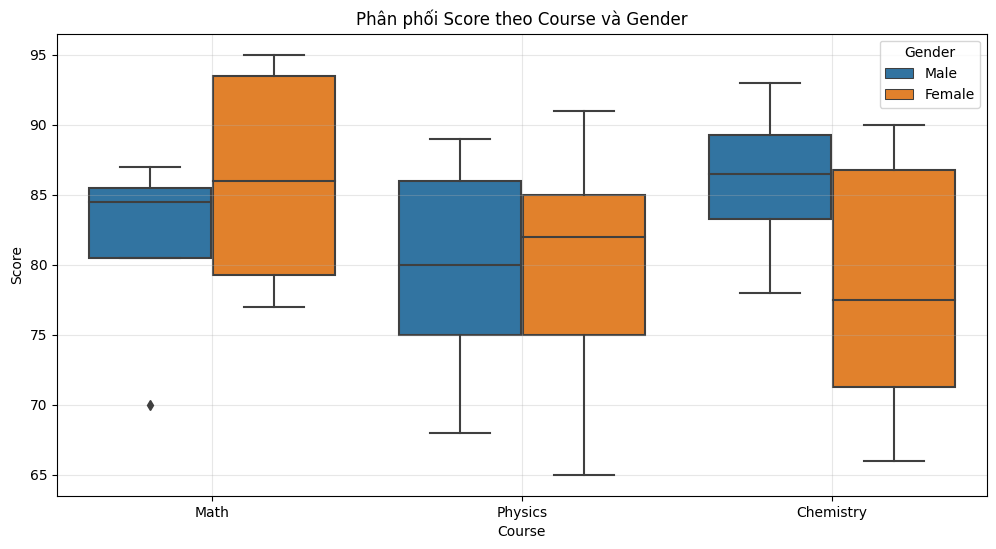

Outliers trong Math - Male:
Student_ID  Score  Study_Hours
      S010     70          3.0



In [12]:
# Câu 5: Vẽ boxplot của Score theo Course và Gender bằng Seaborn
# Đầu tiên, điền các giá trị thiếu trong Gender để vẽ biểu đồ
df_gender = df.copy()
df_gender['Gender'].fillna(df_gender['Gender'].mode()[0], inplace=True)

# Vẽ boxplot kết hợp Course và Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df_gender)
plt.title('Phân phối Score theo Course và Gender')
plt.xlabel('Course')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)
plt.show()

# Xác định outlier bằng IQR
outliers = {}
for course in df_gender['Course'].unique():
    for gender in df_gender['Gender'].unique():
        subset = df_gender[(df_gender['Course'] == course) & (df_gender['Gender'] == gender)]
        q1 = subset['Score'].quantile(0.25)
        q3 = subset['Score'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Xác định các outlier
        course_outliers = subset[(subset['Score'] < lower_bound) | (subset['Score'] > upper_bound)]
        
        if not course_outliers.empty:
            outliers[f"{course}_{gender}"] = course_outliers
            print(f"Outliers trong {course} - {gender}:")
            print(course_outliers[['Student_ID', 'Score', 'Study_Hours']].to_string(index=False))
            print()

Dựa trên kết quả, tôi đề xuất kế hoạch hỗ trợ cá nhân cho sinh viên outlier:

1. Outlier tích cực (điểm cao bất thường)

- Phân tích phương pháp học tập của sinh viên này
- Mời họ tham gia chương trình mentor học tập
- Tổ chức các buổi chia sẻ kinh nghiệm học tập


2. Outlier tiêu cực (điểm thấp bất thường)

- Xác định nguyên nhân cụ thể (kiến thức nền tảng, phương pháp học, hoàn cảnh cá nhân)
- Cung cấp kế hoạch học tập cá nhân hóa với mục tiêu cụ thể ngắn hạn
- Gán mentor 1-1 và theo dõi tiến độ hàng tuần
- Cung cấp nguồn học liệu bổ sung phù hợp với phong cách học tập


3. Theo dõi và đánh giá

- Thiết lập hệ thống theo dõi tiến độ học tập
- Đánh giá hiệu quả của chương trình hỗ trợ
- Điều chỉnh kế hoạch dựa trên phản hồi và kết quả

4. Kế hoạch này nâng cao chất lượng giáo dục vì:

- Cá nhân hóa việc học tập theo nhu cầu cụ thể của sinh viên
- Xác định và giải quyết sớm các vấn đề học tập
- Tạo cơ hội học tập từ những sinh viên xuất sắc
- Thúc đẩy văn hóa hỗ trợ đồng đẳng và chia sẻ kiến thức

### 6. (4 điểm) Tạo cột mới Efficiency = Score / Study_Hours. Tìm sinh viên có Efficiency cao nhất, sau đó đề xuất một phần thưởng hoặc chương trình học bổng dựa trên chỉ số này, giải thích tác động của nó đến động lực học tập của sinh viên khác.

5 sinh viên có Efficiency cao nhất:
Student_ID    Course  Score  Study_Hours  Efficiency
      S021 Chemistry     66          2.0   33.000000
      S029   Physics     80          3.0   26.666667
      S025      Math     79          3.0   26.333333
      S018 Chemistry     72          3.0   24.000000
      S010      Math     70          3.0   23.333333

Sinh viên có Efficiency cao nhất:
Student ID: S021
Course: Chemistry
Score: 66
Study_Hours: 2.0
Efficiency: 33.00


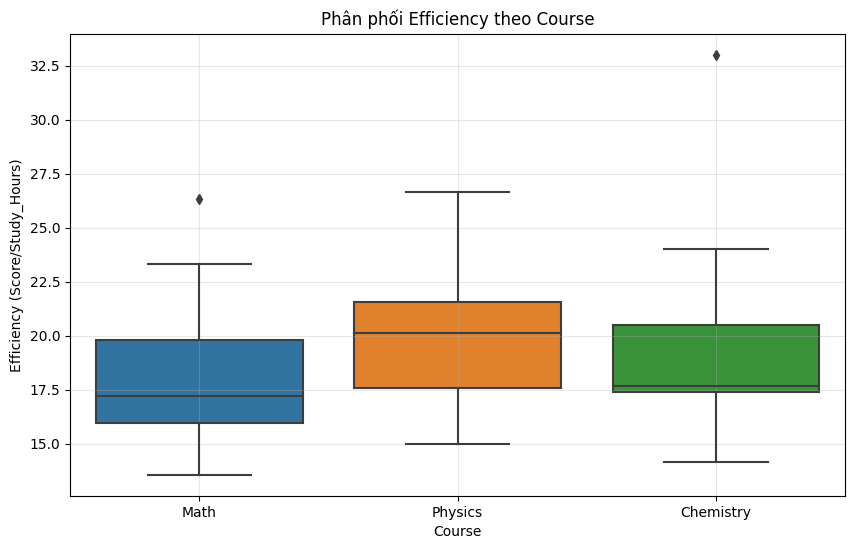

In [13]:
# Câu 6: Tạo cột mới Efficiency = Score / Study_Hours
df_efficiency = df.copy()

# Điền các giá trị thiếu trong Study_Hours trước khi tính Efficiency
df_efficiency['Study_Hours'].fillna(df_efficiency['Study_Hours'].median(), inplace=True)

# Tính Efficiency
df_efficiency['Efficiency'] = df_efficiency['Score'] / df_efficiency['Study_Hours']

# Hiển thị 5 sinh viên có Efficiency cao nhất
top_efficiency = df_efficiency.sort_values('Efficiency', ascending=False).head(5)
print("5 sinh viên có Efficiency cao nhất:")
print(top_efficiency[['Student_ID', 'Course', 'Score', 'Study_Hours', 'Efficiency']].to_string(index=False))

# Sinh viên có Efficiency cao nhất
highest_efficiency_student = df_efficiency.loc[df_efficiency['Efficiency'].idxmax()]
print("\nSinh viên có Efficiency cao nhất:")
print(f"Student ID: {highest_efficiency_student['Student_ID']}")
print(f"Course: {highest_efficiency_student['Course']}")
print(f"Score: {highest_efficiency_student['Score']}")
print(f"Study_Hours: {highest_efficiency_student['Study_Hours']}")
print(f"Efficiency: {highest_efficiency_student['Efficiency']:.2f}")

# Vẽ biểu đồ Efficiency theo Course
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Efficiency', data=df_efficiency)
plt.title('Phân phối Efficiency theo Course')
plt.xlabel('Course')
plt.ylabel('Efficiency (Score/Study_Hours)')
plt.grid(True, alpha=0.3)
plt.show()

Dựa trên kết quả, tôi đề xuất chương trình học bổng dựa trên chỉ số Efficiency:

1. Học bổng "Học tập Hiệu quả"

- Tiêu chí: Dành cho sinh viên có chỉ số Efficiency cao nhất trong mỗi khoa/ngành
- Giá trị: Học bổng 100% học phí cho học kỳ tiếp theo
- Công nhận: Chứng chỉ "Học tập Hiệu quả" và cơ hội làm trợ giảng


2. Cấp độ học bổng

- Platinum (Top 1%): Miễn 100% học phí + cơ hội nghiên cứu với giáo sư
- Gold (Top 5%): Miễn 75% học phí + khóa học nâng cao
- Silver (Top 10%): Miễn 50% học phí
- Bronze (Top 15%): Miễn 25% học phí


3. Chia sẻ phương pháp học tập

- Tổ chức workshop do người đạt học bổng hướng dẫn
- Phát triển tài liệu "Bí quyết học tập hiệu quả" dựa trên phương pháp của các sinh viên xuất sắc
- Xây dựng cộng đồng chia sẻ kinh nghiệm học tập

### 7. (4 điểm) Tính tỷ lệ sinh viên nữ (Gender = Female) trong từng Course sau khi điền giá trị thiếu bằng mode. Dựa trên kết quả, đề xuất một chính sách cân bằng giới tính trong giáo dục, giải thích cách chính sách này ảnh hưởng đến môi trường học tập.


Tỷ lệ sinh viên nữ trong từng Course:
Math: 60.00%
Physics: 50.00%
Chemistry: 60.00%


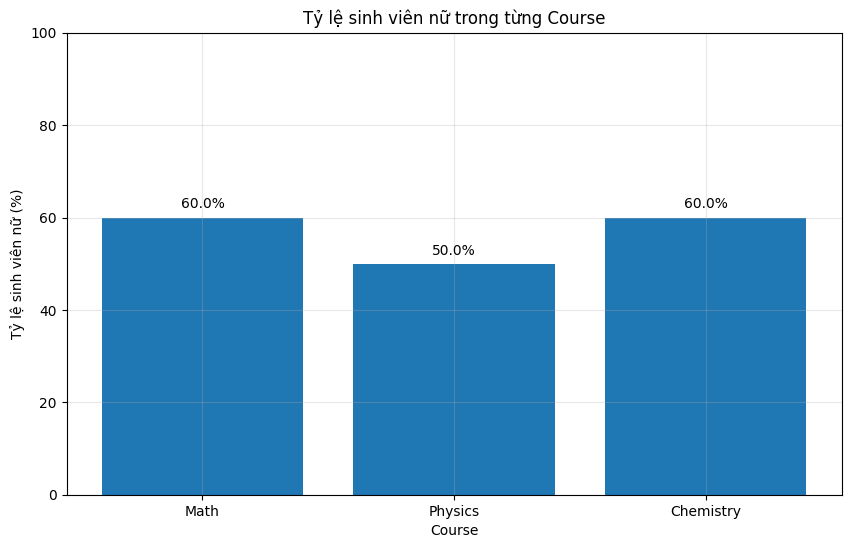

In [14]:
# Câu 7: Tính tỷ lệ sinh viên nữ (Gender = Female) trong từng Course sau khi điền giá trị thiếu bằng mode
df_gender_ratio = df.copy()

# Điền giá trị thiếu trong Gender bằng mode
gender_mode = df_gender_ratio['Gender'].mode()[0]
df_gender_ratio['Gender'].fillna(gender_mode, inplace=True)

# Tính tỷ lệ sinh viên nữ trong từng Course
female_ratios = {}
for course in df_gender_ratio['Course'].unique():
    course_df = df_gender_ratio[df_gender_ratio['Course'] == course]
    female_count = sum(course_df['Gender'] == 'Female')
    total_count = len(course_df)
    female_ratio = female_count / total_count * 100
    female_ratios[course] = female_ratio
    
# Hiển thị kết quả
print("Tỷ lệ sinh viên nữ trong từng Course:")
for course, ratio in female_ratios.items():
    print(f"{course}: {ratio:.2f}%")

# Vẽ biểu đồ tỷ lệ sinh viên nữ
plt.figure(figsize=(10, 6))
plt.bar(female_ratios.keys(), female_ratios.values())
plt.title('Tỷ lệ sinh viên nữ trong từng Course')
plt.xlabel('Course')
plt.ylabel('Tỷ lệ sinh viên nữ (%)')
plt.ylim(0, 100)
for course, ratio in female_ratios.items():
    plt.text(course, ratio + 2, f"{ratio:.1f}%", ha='center')
plt.grid(True, alpha=0.3)
plt.show()

Chính sách này sẽ ảnh hưởng đến môi trường học tập thông qua:

- Tạo môi trường học tập đa dạng, phản ánh thế giới thực
- Cung cấp nhiều quan điểm và cách tiếp cận khác nhau trong học tập
- Giảm các rào cản vô hình đối với các nhóm thiểu số
- Tạo cơ hội bình đẳng cho mọi sinh viên phát triển tiềm năng
- Chuẩn bị sinh viên tốt hơn cho môi trường làm việc đa dạng trong tương lai

### 8. (4 điểm) Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus. Đề xuất một kế hoạch cải thiện điểm danh cho từng Campus dựa trên phân bố dữ liệu, giải thích tại sao kế hoạch này tối ưu hóa kết quả học tập.

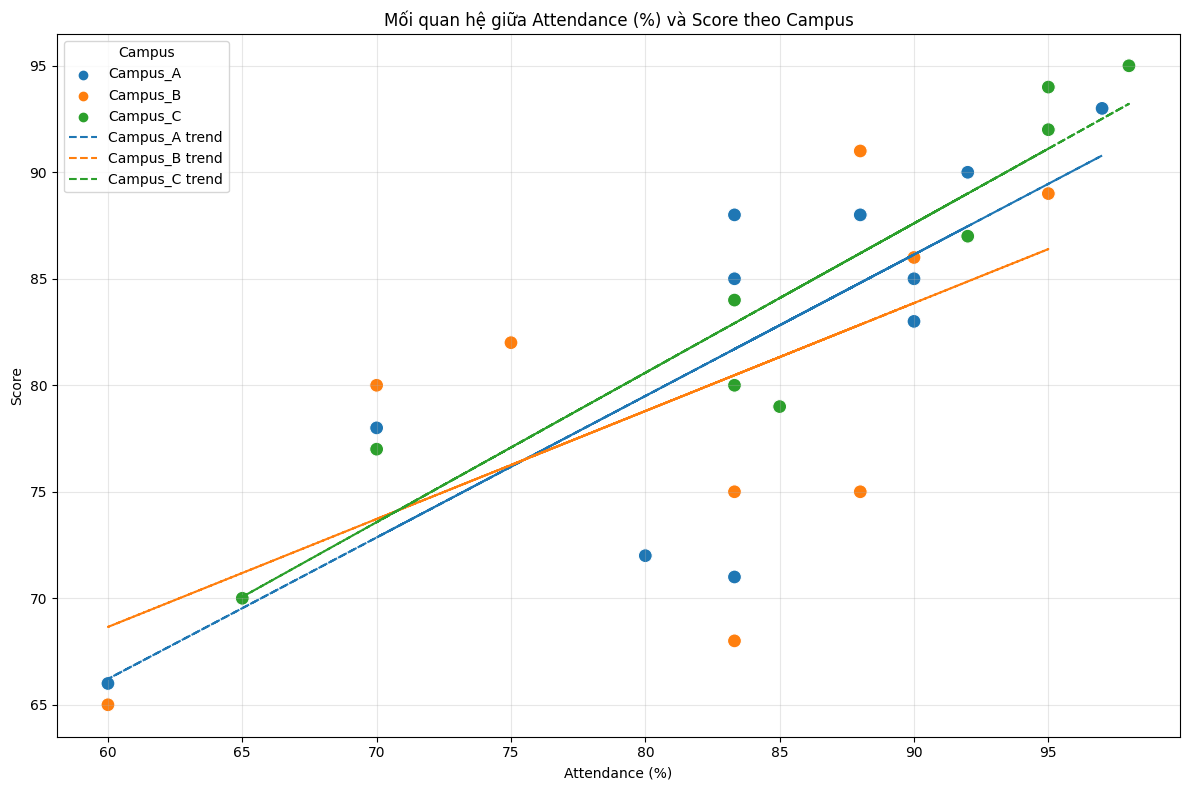

Tương quan giữa Attendance và Score tại Campus_A: 0.7968
Tương quan giữa Attendance và Score tại Campus_B: 0.6083
Tương quan giữa Attendance và Score tại Campus_C: 0.9434

Thống kê Attendance (%) theo Campus:
               mean     median   min   max        std
Campus                                               
Campus_A  83.359504  83.318182  60.0  97.0  10.516093
Campus_B  81.595455  83.318182  60.0  95.0  10.464630
Campus_C  85.181818  85.000000  65.0  98.0  11.447486


In [15]:
# Câu 8: Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus
df_attendance_score = df.copy()

# Điền giá trị thiếu trong Attendance (%)
df_attendance_score['Attendance (%)'].fillna(df_attendance_score['Attendance (%)'].mean(), inplace=True)

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Attendance (%)', y='Score', hue='Campus', data=df_attendance_score, s=100)
plt.title('Mối quan hệ giữa Attendance (%) và Score theo Campus')
plt.xlabel('Attendance (%)')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

# Thêm đường hồi quy cho từng Campus
for campus in df_attendance_score['Campus'].unique():
    campus_data = df_attendance_score[df_attendance_score['Campus'] == campus]
    m, b = np.polyfit(campus_data['Attendance (%)'], campus_data['Score'], 1)
    plt.plot(campus_data['Attendance (%)'], m*campus_data['Attendance (%)'] + b, linestyle='--', label=f'{campus} trend')

plt.legend(title='Campus')
plt.tight_layout()
plt.show()

# Tính tương quan giữa Attendance và Score cho từng Campus
for campus in df_attendance_score['Campus'].unique():
    campus_data = df_attendance_score[df_attendance_score['Campus'] == campus]
    corr = campus_data['Attendance (%)'].corr(campus_data['Score'])
    print(f"Tương quan giữa Attendance và Score tại {campus}: {corr:.4f}")

# Tính thống kê Attendance theo Campus
attendance_stats = df_attendance_score.groupby('Campus')['Attendance (%)'].agg(['mean', 'median', 'min', 'max', 'std'])
print("\nThống kê Attendance (%) theo Campus:")
print(attendance_stats)

Kế hoạch này tối ưu hóa kết quả học tập vì nó:

- Tùy chỉnh chiến lược điểm danh dựa trên đặc điểm của từng Campus
- Giải quyết các rào cản cụ thể đối với việc tham dự
- Tận dụng mối tương quan giữa điểm danh và kết quả học tập
- Cân bằng giữa yêu cầu tham dự và tính linh hoạt trong học tập
- Sử dụng công nghệ để đơn giản hóa quy trình và tăng tỷ lệ tham dự

### 9. (4 điểm) Tính trung bình Score của từng Course sau khi điền dữ liệu thiếu. Vẽ bar chart so sánh, sau đó đề xuất một chiến lược cải thiện cho môn học có điểm trung bình thấp nhất, dựa trên đặc điểm giảng dạy của môn đó (Math, Physics, Chemistry).


Điểm trung bình theo Course:
      Course  Score
2    Physics   79.6
0  Chemistry   81.4
1       Math   84.3

Môn học có điểm trung bình thấp nhất: Physics (79.60)


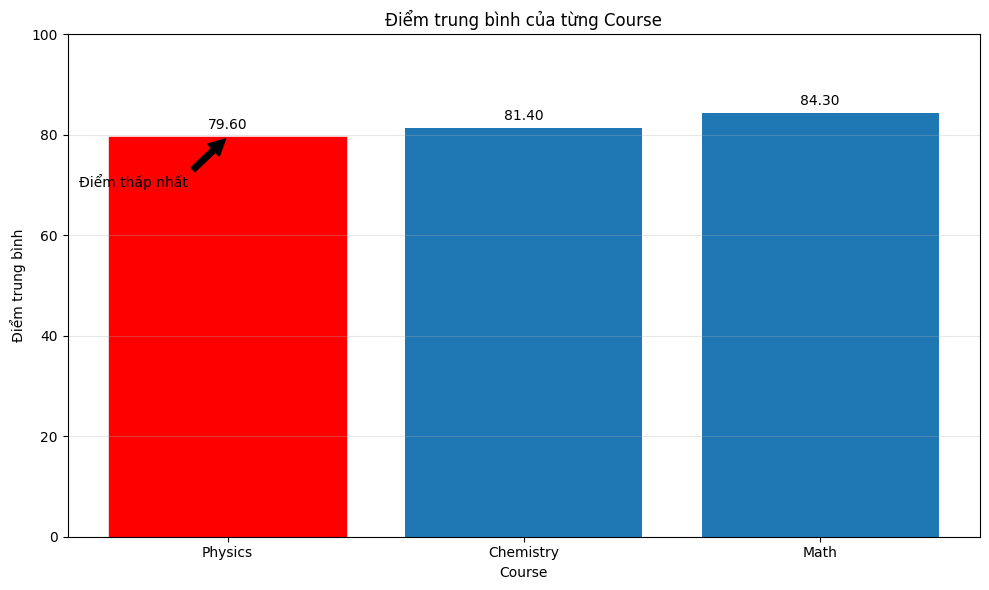

In [16]:
# Câu 9: Tính trung bình Score của từng Course sau khi điền dữ liệu thiếu
df_score_by_course = df.copy()

# Tính trung bình Score theo Course
course_avg_scores = df_score_by_course.groupby('Course')['Score'].mean().reset_index()
course_avg_scores = course_avg_scores.sort_values('Score')  # Sắp xếp để xác định môn học điểm thấp nhất
print("Điểm trung bình theo Course:")
print(course_avg_scores)

lowest_course = course_avg_scores.iloc[0]['Course']
lowest_score = course_avg_scores.iloc[0]['Score']
print(f"\nMôn học có điểm trung bình thấp nhất: {lowest_course} ({lowest_score:.2f})")

# Vẽ bar chart so sánh
plt.figure(figsize=(10, 6))
bars = plt.bar(course_avg_scores['Course'], course_avg_scores['Score'])
plt.title('Điểm trung bình của từng Course')
plt.xlabel('Course')
plt.ylabel('Điểm trung bình')
plt.ylim(0, 100)

# Thêm giá trị lên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.2f}', ha='center', va='bottom')

# Đánh dấu môn học có điểm thấp nhất
lowest_idx = course_avg_scores['Course'].tolist().index(lowest_course)
bars[lowest_idx].set_color('red')
plt.annotate('Điểm thấp nhất', xy=(lowest_idx, lowest_score), 
             xytext=(lowest_idx-0.5, lowest_score-10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Chiến lược này dựa trên đặc điểm giảng dạy của môn học đó:

- Môn học có điểm thấp thường có tính trừu tượng hoặc khó hiểu ở khía cạnh nào đó
- Điều chỉnh cách tiếp cận dựa trên đặc điểm của môn học
- Tạo nhiều cơ hội để sinh viên thực hành và ứng dụng kiến thức
- Tăng tương tác giữa giảng viên và sinh viên
- Phát triển hệ thống hỗ trợ toàn diện để giải quyết khó khăn cụ thể

### 10. (4 điểm) Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85 bằng Pandas. Đề xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng tự học, tài liệu, công nghệ) giúp họ đạt điểm cao, giải thích cách áp dụng kết quả cho toàn trường.

In [19]:
# Câu 10: Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85 bằng Pandas
df_high_performers = df.copy()

# Lọc sinh viên đáp ứng điều kiện
high_performers = df_high_performers[(df_high_performers['Attendance (%)'] < 70) & 
                                     (df_high_performers['Attendance (%)'].notnull()) &
                                     (df_high_performers['Score'] > 85)]

print("Các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:")
print(high_performers[['Student_ID', 'Course', 'Score', 'Attendance (%)', 'Study_Hours', 'Gender', 'Campus']])

# Phân tích thêm về đặc điểm của các sinh viên này
if not high_performers.empty:
    print("\nThống kê về các sinh viên này:")
    print(f"Số lượng: {len(high_performers)}")
    print(f"Điểm trung bình: {high_performers['Score'].mean():.2f}")
    print(f"Thời gian học trung bình: {high_performers['Study_Hours'].mean():.2f} giờ")
    print(f"Điểm danh trung bình: {high_performers['Attendance (%)'].mean():.2f}%")
    
    # Phân bố theo Course
    course_counts = high_performers['Course'].value_counts()
    print("\nPhân bố theo Course:")
    for course, count in course_counts.items():
        print(f"{course}: {count} sinh viên")
    
    # Phân bố theo Campus
    campus_counts = high_performers['Campus'].value_counts()
    print("\nPhân bố theo Campus:")
    for campus, count in campus_counts.items():
        print(f"{campus}: {count} sinh viên")

Các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


Cách áp dụng kết quả cho toàn trường:

- Phát triển khóa học ngắn về kỹ năng tự học hiệu quả dựa trên phát hiện từ nghiên cứu
- Tạo thư viện tài liệu học tập bổ sung dựa trên nguồn tài liệu mà các sinh viên thành công sử dụng
- Tích hợp các chiến lược học tập hiệu quả vào hướng dẫn đầu khóa học
- Điều chỉnh phương pháp giảng dạy để tích hợp các yếu tố tự học thành công
- Phát triển công cụ đánh giá phong cách học tập và đề xuất chiến lược phù hợp cho từng sinh viên

### 11. (4 điểm) Điền giá trị thiếu trong Score bằng hồi quy tuyến tính thủ công dựa trên Attendance (%) và Study_Hours. So sánh với phương pháp trung bình, sau đó đề xuất một cách tiếp cận lai (kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.

Mô hình hồi quy tuyến tính thủ công:
Score = 1.9006 + 0.6470 * Attendance (%) + 5.9486 * Study_Hours


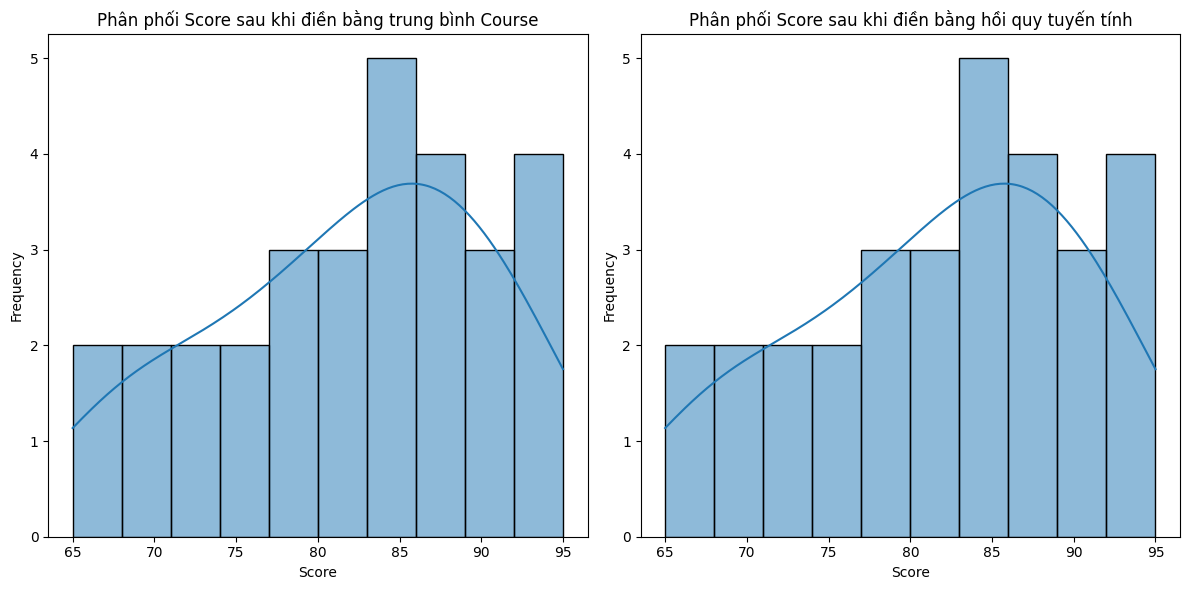


Thống kê sau khi điền bằng phương pháp trung bình:
count    30.000000
mean     81.766667
std       8.576967
min      65.000000
25%      75.500000
50%      83.500000
75%      88.000000
max      95.000000
Name: Score, dtype: float64

Thống kê sau khi điền bằng phương pháp hồi quy:
count    30.000000
mean     81.766667
std       8.576967
min      65.000000
25%      75.500000
50%      83.500000
75%      88.000000
max      95.000000
Name: Score, dtype: float64


In [20]:
# Câu 11: Điền giá trị thiếu trong Score bằng hồi quy tuyến tính thủ công dựa trên Attendance (%) và Study_Hours
df_regression = df.copy()

# Tạo dữ liệu huấn luyện (loại bỏ các dòng có giá trị NaN trong các biến dự đoán)
train_data = df_regression.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])

# Xây dựng mô hình hồi quy thủ công
X = train_data[['Attendance (%)', 'Study_Hours']].values
y = train_data['Score'].values

# Tính hệ số hồi quy thủ công
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean)[:, np.newaxis], axis=0)
denominator = np.sum((X - X_mean) ** 2, axis=0)
beta = numerator / denominator
alpha = y_mean - np.sum(beta * X_mean)

print("Mô hình hồi quy tuyến tính thủ công:")
print(f"Score = {alpha:.4f} + {beta[0]:.4f} * Attendance (%) + {beta[1]:.4f} * Study_Hours")

# Điền giá trị thiếu bằng mô hình hồi quy
df_regression_imputed = df_regression.copy()
for idx, row in df_regression_imputed.iterrows():
    if pd.isna(row['Score']) and not pd.isna(row['Attendance (%)']) and not pd.isna(row['Study_Hours']):
        predicted_score = alpha + beta[0] * row['Attendance (%)'] + beta[1] * row['Study_Hours']
        df_regression_imputed.at[idx, 'Score'] = predicted_score

# Điền giá trị thiếu bằng phương pháp trung bình của Course
df_mean_imputed = df.copy()
course_means = df_mean_imputed.groupby('Course')['Score'].mean()
for course in df_mean_imputed['Course'].unique():
    mean_score = course_means[course]
    df_mean_imputed.loc[(df_mean_imputed['Course'] == course) & (df_mean_imputed['Score'].isnull()), 'Score'] = mean_score

# So sánh kết quả của hai phương pháp
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_mean_imputed['Score'], kde=True, bins=10)
plt.title('Phân phối Score sau khi điền bằng trung bình Course')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_regression_imputed['Score'], kde=True, bins=10)
plt.title('Phân phối Score sau khi điền bằng hồi quy tuyến tính')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Phân tích thống kê mô tả sau khi điền
print("\nThống kê sau khi điền bằng phương pháp trung bình:")
print(df_mean_imputed['Score'].describe())
print("\nThống kê sau khi điền bằng phương pháp hồi quy:")
print(df_regression_imputed['Score'].describe())

1. Quy trình thực hiện:

- Chia dữ liệu theo Course
- Xây dựng mô hình hồi quy cho từng nhóm dữ liệu
- Đánh giá độ chính xác của mô hình bằng R² hoặc cross-validation
- Tính trọng số dựa trên độ chính xác của mô hình
- Áp dụng công thức lai để ước tính giá trị thiếu


2. Lý do cách tiếp cận này hiệu quả hơn:

- Tận dụng điểm mạnh của cả hai phương pháp:

- Hồi quy: Nắm bắt mối quan hệ giữa các biến
- Trung bình Course: Ổn định và phản ánh đặc trưng của môn học


3. Giảm thiểu rủi ro khi một phương pháp có vấn đề:

- Nếu mô hình hồi quy kém, trọng số sẽ nghiêng về trung bình Course
- Nếu trung bình Course không đại diện, trọng số sẽ nghiêng về hồi quy


- Tính đến đặc thù của từng Course thay vì áp dụng cùng một mô hình cho tất cả
- Giúp duy trì phân phối tự nhiên của dữ liệu, tránh các giá trị cực đoan
- Cải thiện độ chính xác tổng thể của quá trình điền giá trị



Phương pháp này đặc biệt hữu ích trong ngữ cảnh giáo dục, nơi các môn học khác nhau có đặc điểm và mối tương quan khác nhau giữa điểm số và các biến dự đoán.

### 12. (4 điểm) Tính skewness của Score bằng SciPy. Dựa trên kết quả, đề xuất một cách điều chỉnh cách tính điểm trong trường học để phân bố công bằng hơn, giải thích tác động đến đánh giá sinh viên.

Skewness của Score: -0.3716


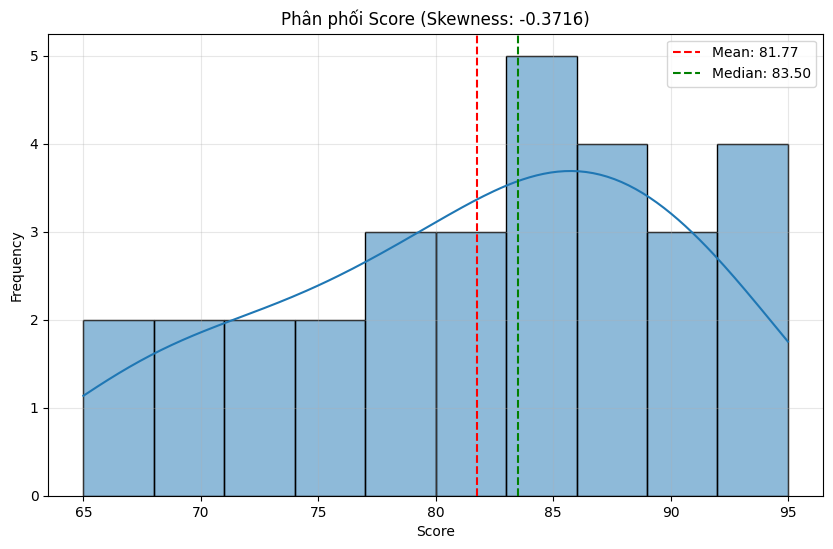


Thống kê mô tả của Score:
count    30.000000
mean     81.766667
std       8.576967
min      65.000000
25%      75.500000
50%      83.500000
75%      88.000000
max      95.000000
Name: Score, dtype: float64


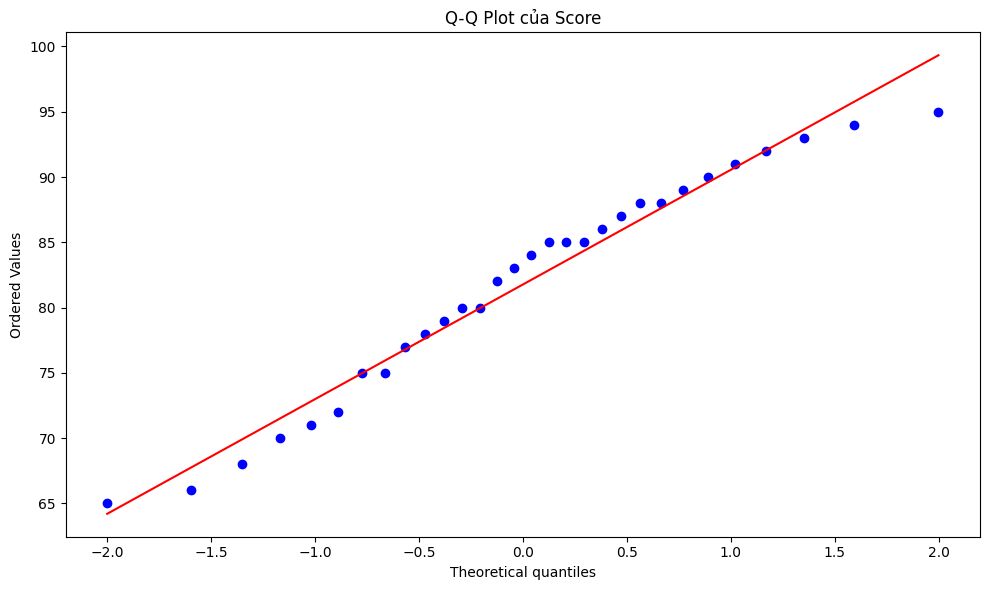

In [21]:
# Câu 12: Tính skewness của Score bằng SciPy
from scipy import stats

# Tính skewness của Score
score_skewness = stats.skew(df['Score'])
print(f"Skewness của Score: {score_skewness:.4f}")

# Vẽ histogram để trực quan hóa phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, bins=10)
plt.axvline(df['Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Score"].mean():.2f}')
plt.axvline(df['Score'].median(), color='green', linestyle='--', label=f'Median: {df["Score"].median():.2f}')
plt.title(f'Phân phối Score (Skewness: {score_skewness:.4f})')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Phân tích thêm thống kê mô tả của Score
score_stats = df['Score'].describe()
print("\nThống kê mô tả của Score:")
print(score_stats)

# Vẽ Q-Q plot để kiểm tra tính chuẩn
plt.figure(figsize=(10, 6))
stats.probplot(df['Score'], plot=plt)
plt.title('Q-Q Plot của Score')
plt.tight_layout()
plt.show()

Tác động đến đánh giá sinh viên:

- Công bằng hơn trong việc đánh giá khả năng thực sự của sinh viên
- Giảm thiểu hiệu ứng "trần" và "sàn" điểm
- Tạo động lực cho sinh viên ở mọi mức độ khả năng
- Giúp sinh viên nhận diện rõ ràng hơn về vị trí của họ so với chuẩn
- Cung cấp thông tin chính xác hơn cho quá trình đánh giá và cải thiện giảng dạy

### 13. (4 điểm) Vẽ pairplot bằng Seaborn cho Score, Attendance (%), Study_Hours. Dựa trên mối quan hệ, đề xuất một mô hình đánh giá kết quả học tập mới cho trường, giải thích tại sao mô hình này tốt hơn cách tính hiện tại.


<Figure size 1200x1000 with 0 Axes>

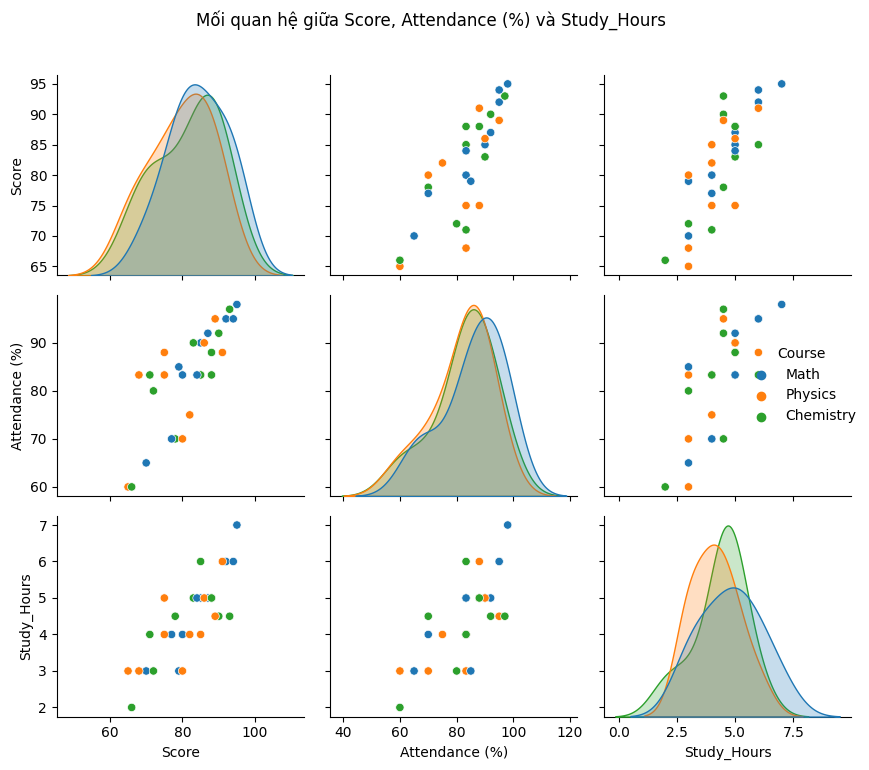

Ma trận tương quan:
                   Score  Attendance (%)  Study_Hours
Score           1.000000        0.783684     0.807542
Attendance (%)  0.783684        1.000000     0.718592
Study_Hours     0.807542        0.718592     1.000000


In [22]:
# Câu 13: Vẽ pairplot bằng Seaborn cho Score, Attendance (%), Study_Hours
# Tạo một bản sao và điền giá trị thiếu để có thể vẽ pairplot
df_pairplot = df.copy()
df_pairplot['Attendance (%)'].fillna(df_pairplot['Attendance (%)'].mean(), inplace=True)
df_pairplot['Study_Hours'].fillna(df_pairplot['Study_Hours'].median(), inplace=True)

# Vẽ pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df_pairplot[['Score', 'Attendance (%)', 'Study_Hours', 'Course']], hue='Course')
plt.suptitle('Mối quan hệ giữa Score, Attendance (%) và Study_Hours', y=1.02)
plt.tight_layout()
plt.show()

# Tính ma trận tương quan
correlation_matrix = df_pairplot[['Score', 'Attendance (%)', 'Study_Hours']].corr()
print("Ma trận tương quan:")
print(correlation_matrix)

Đề xuất mô hình đánh giá kết quả học tập mới:

- Mô hình tích hợp 3 yếu tố: Tạo công thức tích hợp điểm danh, giờ học, và điểm thi
- Trọng số tương quan: Mỗi thành phần có trọng số dựa trên hệ số tương quan với điểm số
- Điểm thưởng tiến bộ: Thêm điểm thưởng cho sự cải thiện qua thời gian
- Đánh giá cá nhân hóa: Điều chỉnh theo từng môn học dựa trên mối tương quan đặc thù

Mô hình này tốt hơn vì phản ánh trọn vẹn nỗ lực học tập, tính đến đặc điểm môn học, và cân bằng giữa kết quả và quá trình.

### 14. (4 điểm) Nhóm dữ liệu theo Campus, tính tỷ lệ sinh viên có Score trên 80. Vẽ pie chart so sánh, sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Campus dựa trên tỷ lệ, giải thích tác động đến tinh thần học tập.

Tỷ lệ sinh viên có Score trên 80 theo Campus:
Campus_A: 63.64%
Campus_B: 50.00%
Campus_C: 55.56%


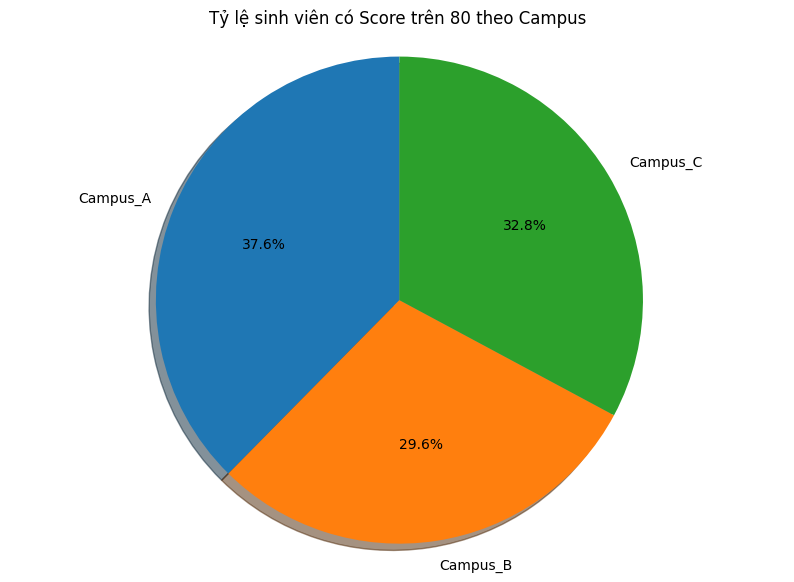

In [23]:
# Câu 14: Nhóm dữ liệu theo Campus, tính tỷ lệ sinh viên có Score trên 80
high_score_threshold = 80

campus_high_score_ratios = {}
for campus in df['Campus'].unique():
    campus_df = df[df['Campus'] == campus]
    high_score_count = sum(campus_df['Score'] > high_score_threshold)
    total_count = len(campus_df)
    ratio = high_score_count / total_count * 100
    campus_high_score_ratios[campus] = ratio

# Hiển thị kết quả
print(f"Tỷ lệ sinh viên có Score trên {high_score_threshold} theo Campus:")
for campus, ratio in campus_high_score_ratios.items():
    print(f"{campus}: {ratio:.2f}%")

# Vẽ pie chart
plt.figure(figsize=(10, 7))
plt.pie(campus_high_score_ratios.values(), labels=campus_high_score_ratios.keys(), 
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title(f'Tỷ lệ sinh viên có Score trên {high_score_threshold} theo Campus')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Chiến lược khen thưởng khác nhau:

- Campus_A (tỷ lệ cao): Khen thưởng tập thể và cạnh tranh toàn trường
- Campus_B (tỷ lệ trung bình): Cá nhân hóa khen thưởng và tạo thử thách lớp học
- Campus_C (tỷ lệ thấp nhất): Khen thưởng tiến bộ và tạo hệ thống cố vấn học tập

Tác động: Tạo động lực phù hợp với từng môi trường học tập, tăng tinh thần cạnh tranh lành mạnh, và tạo cơ hội thành công cho mọi sinh viên.

### 15. (4 điểm) Tạo hàm Python xác định sinh viên có Score ngoài 2 độ lệch chuẩn. Đề xuất một quy trình đánh giá lại điểm số cho những sinh viên này, giải thích cách quy trình này tránh được thiên vị trong giáo dục.

Phân tích toàn bộ dữ liệu
Điểm trung bình: 81.77
Độ lệch chuẩn: 8.58
Ngưỡng trên (mean + 2*std): 98.92
Ngưỡng dưới (mean - 2*std): 64.61
Số sinh viên có điểm ngoài 2 độ lệch chuẩn: 0

Sinh viên có điểm ngoài 2 độ lệch chuẩn (toàn bộ dữ liệu):
Không tìm thấy sinh viên nào có điểm ngoài 2 độ lệch chuẩn.

Phân tích Course: Math
Điểm trung bình: 84.30
Độ lệch chuẩn: 8.03
Ngưỡng trên (mean + 2*std): 100.36
Ngưỡng dưới (mean - 2*std): 68.24
Số sinh viên có điểm ngoài 2 độ lệch chuẩn: 0

Sinh viên có điểm ngoài 2 độ lệch chuẩn (Course: Math):
Không tìm thấy sinh viên nào có điểm ngoài 2 độ lệch chuẩn trong Math.

Phân tích Course: Physics
Điểm trung bình: 79.60
Độ lệch chuẩn: 8.72
Ngưỡng trên (mean + 2*std): 97.04
Ngưỡng dưới (mean - 2*std): 62.16
Số sinh viên có điểm ngoài 2 độ lệch chuẩn: 0

Sinh viên có điểm ngoài 2 độ lệch chuẩn (Course: Physics):
Không tìm thấy sinh viên nào có điểm ngoài 2 độ lệch chuẩn trong Physics.

Phân tích Course: Chemistry
Điểm trung bình: 81.40
Độ lệch chuẩn: 9.

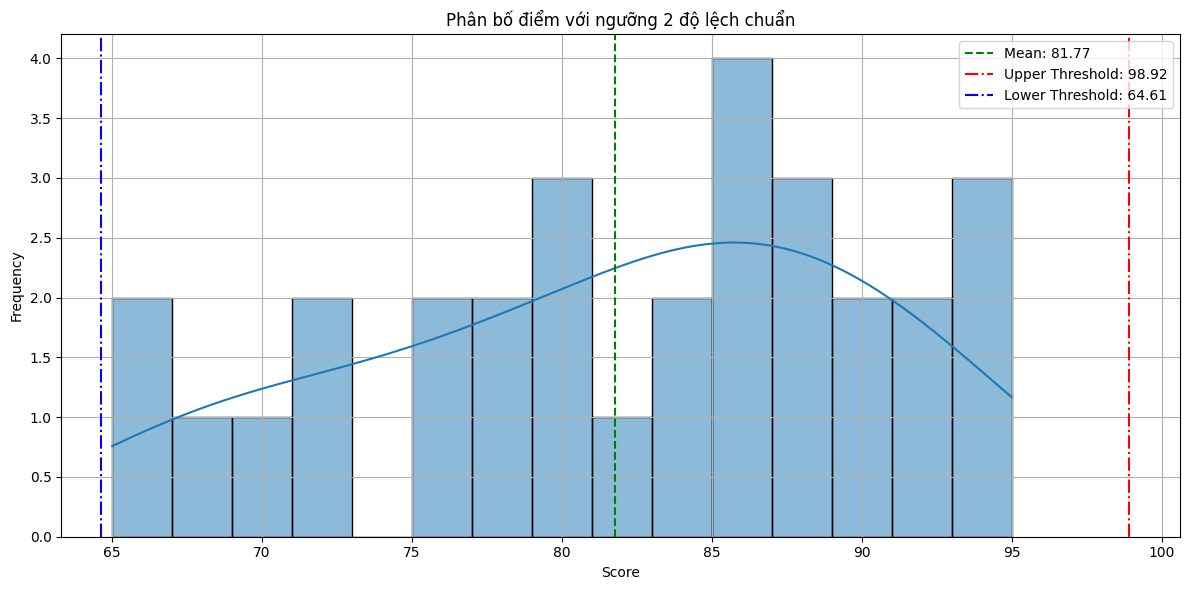

In [27]:
# Tạo hàm Python xác định sinh viên có Score ngoài 2 độ lệch chuẩn
def identify_extreme_scores(dataframe, course=None):
    # Lọc dữ liệu theo Course nếu được chỉ định
    if course:
        df_filtered = dataframe[dataframe['Course'] == course].copy()
    else:
        df_filtered = dataframe.copy()
    
    # Tính toán thống kê
    mean_score = df_filtered['Score'].mean()
    std_score = df_filtered['Score'].std()
    
    # Xác định ngưỡng
    upper_threshold = mean_score + 2 * std_score
    lower_threshold = mean_score - 2 * std_score
    
    # Lọc sinh viên ngoài 2 độ lệch chuẩn
    extreme_high = df_filtered[df_filtered['Score'] > upper_threshold]
    extreme_low = df_filtered[df_filtered['Score'] < lower_threshold]
    extreme_students = pd.concat([extreme_high, extreme_low])
    
    # Thêm cột chỉ ra loại extreme
    extreme_students['Score_Category'] = ['High' if score > upper_threshold else 'Low' 
                                         for score in extreme_students['Score']]
    
    # Thêm thông tin thống kê
    print(f"Phân tích {'toàn bộ dữ liệu' if not course else f'Course: {course}'}")
    print(f"Điểm trung bình: {mean_score:.2f}")
    print(f"Độ lệch chuẩn: {std_score:.2f}")
    print(f"Ngưỡng trên (mean + 2*std): {upper_threshold:.2f}")
    print(f"Ngưỡng dưới (mean - 2*std): {lower_threshold:.2f}")
    print(f"Số sinh viên có điểm ngoài 2 độ lệch chuẩn: {len(extreme_students)}")
    
    return extreme_students

# Kiểm tra hàm với toàn bộ dữ liệu
extreme_all = identify_extreme_scores(df)
print("\nSinh viên có điểm ngoài 2 độ lệch chuẩn (toàn bộ dữ liệu):")
if not extreme_all.empty:
    print(extreme_all[['Student_ID', 'Course', 'Score', 'Score_Category']])
else:
    print("Không tìm thấy sinh viên nào có điểm ngoài 2 độ lệch chuẩn.")

# Kiểm tra hàm với từng Course
for course in df['Course'].unique():
    print("\n" + "="*50)
    extreme_course = identify_extreme_scores(df, course)
    print(f"\nSinh viên có điểm ngoài 2 độ lệch chuẩn (Course: {course}):")
    if not extreme_course.empty:
        print(extreme_course[['Student_ID', 'Score', 'Score_Category']])
    else:
        print(f"Không tìm thấy sinh viên nào có điểm ngoài 2 độ lệch chuẩn trong {course}.")

# Vẽ biểu đồ phân bố điểm với ngưỡng 2 độ lệch chuẩn
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], kde=True, bins=15)

# Thêm đường ngưỡng
mean_score = df['Score'].mean()
std_score = df['Score'].std()
upper_threshold = mean_score + 2 * std_score
lower_threshold = mean_score - 2 * std_score

plt.axvline(mean_score, color='green', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(upper_threshold, color='red', linestyle='-.', label=f'Upper Threshold: {upper_threshold:.2f}')
plt.axvline(lower_threshold, color='blue', linestyle='-.', label=f'Lower Threshold: {lower_threshold:.2f}')

plt.title('Phân bố điểm với ngưỡng 2 độ lệch chuẩn')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Quy trình đánh giá lại điểm số cho sinh viên ngoài 2 độ lệch chuẩn:

- Phỏng vấn đánh giá: Xác định yếu tố ảnh hưởng (tích cực/tiêu cực)
- Bài kiểm tra bổ sung: Đánh giá ở các định dạng khác nhau
- Đánh giá đa chiều: Kết hợp đánh giá từ nhiều giáo viên
- Phản hồi chi tiết: Cung cấp phân tích chi tiết về kết quả

Quy trình này tránh thiên vị bằng cách sử dụng nhiều đánh giá khách quan, có minh chứng rõ ràng, và đảm bảo công bằng cho sinh viên có kết quả bất thường.

## Câu hỏi ANN (40 điểm)
## Xây dựng một ANN để dự đoán Score dựa trên Attendance (%), Study_Hours, và Course (mã hóa one-hot encoding).
### 16. (10 điểm) Điền giá trị thiếu trong Attendance (%) và Study_Hours bằng KNN Imputer từ Scikit- learn (Tham khảo: https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/). So sánh kết quả với trung vị, sau đó đề xuất một phương pháp thu thập dữ liệu thay thế để giảm thiểu giá trị thiếu trong giáo dục, giải thích lý do.

So sánh kết quả điền giá trị thiếu:

Thống kê Attendance (%) sau khi điền bằng KNN Imputer:
count    30.000000
mean     83.000000
std      11.688813
min      60.000000
25%      75.416667
50%      88.000000
75%      91.250000
max      98.000000
Name: Attendance (%), dtype: float64

Thống kê Attendance (%) sau khi điền bằng trung vị:
count    30.000000
mean     84.566667
std      10.714744
min      60.000000
25%      81.250000
50%      88.000000
75%      90.000000
max      98.000000
Name: Attendance (%), dtype: float64

Thống kê Study_Hours sau khi điền bằng KNN Imputer:
count    30.000000
mean      4.522222
std       1.230778
min       2.000000
25%       3.750000
50%       5.000000
75%       5.250000
max       7.000000
Name: Study_Hours, dtype: float64

Thống kê Study_Hours sau khi điền bằng trung vị:
count    30.000000
mean      4.433333
std       1.150212
min       2.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: Study_Hours, dtype: float64


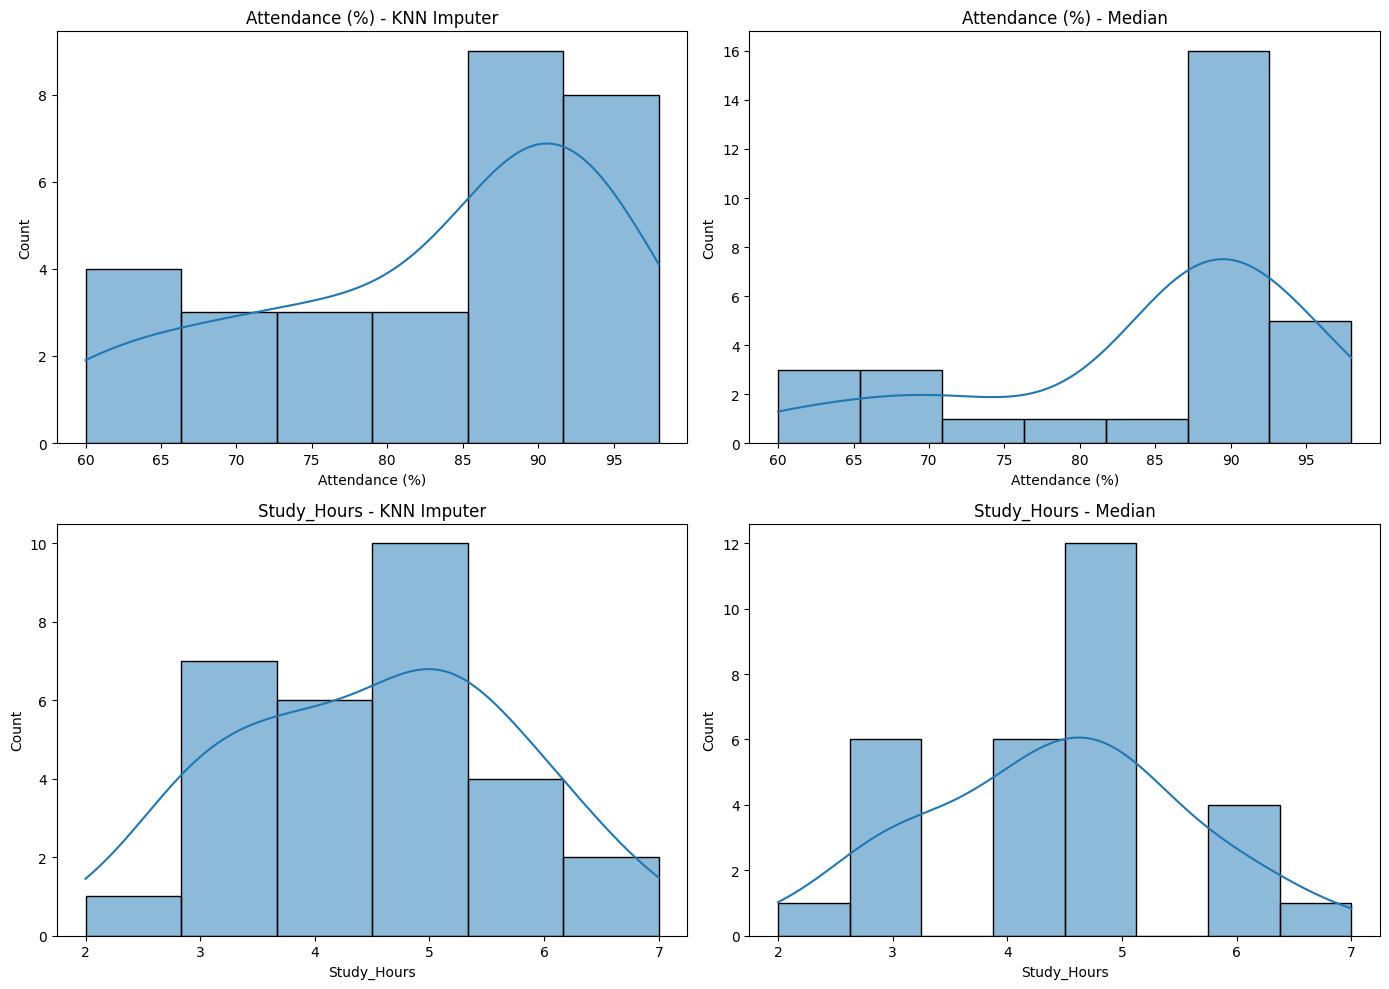

In [28]:
# Câu 16: Điền giá trị thiếu trong Attendance (%) và Study_Hours bằng KNN Imputer
from sklearn.impute import KNNImputer

# Chuẩn bị dữ liệu
df_knn_impute = df.copy()

# Chỉ lấy các cột số để áp dụng KNN Imputer
numeric_cols = ['Score', 'Attendance (%)', 'Study_Hours']
data_to_impute = df_knn_impute[numeric_cols].copy()

# Áp dụng KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(data_to_impute)

# Tạo DataFrame mới với dữ liệu đã được điền
df_knn_imputed = df_knn_impute.copy()
df_knn_imputed[numeric_cols] = imputed_data

# Điền giá trị thiếu bằng trung vị để so sánh
df_median_imputed = df.copy()
df_median_imputed['Attendance (%)'].fillna(df_median_imputed['Attendance (%)'].median(), inplace=True)
df_median_imputed['Study_Hours'].fillna(df_median_imputed['Study_Hours'].median(), inplace=True)

# So sánh kết quả
print("So sánh kết quả điền giá trị thiếu:")
print("\nThống kê Attendance (%) sau khi điền bằng KNN Imputer:")
print(df_knn_imputed['Attendance (%)'].describe())
print("\nThống kê Attendance (%) sau khi điền bằng trung vị:")
print(df_median_imputed['Attendance (%)'].describe())

print("\nThống kê Study_Hours sau khi điền bằng KNN Imputer:")
print(df_knn_imputed['Study_Hours'].describe())
print("\nThống kê Study_Hours sau khi điền bằng trung vị:")
print(df_median_imputed['Study_Hours'].describe())

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Attendance (%) - KNN
sns.histplot(df_knn_imputed['Attendance (%)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Attendance (%) - KNN Imputer')

# Attendance (%) - Median
sns.histplot(df_median_imputed['Attendance (%)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Attendance (%) - Median')

# Study_Hours - KNN
sns.histplot(df_knn_imputed['Study_Hours'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Study_Hours - KNN Imputer')

# Study_Hours - Median
sns.histplot(df_median_imputed['Study_Hours'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Study_Hours - Median')

plt.tight_layout()
plt.show()

Phương pháp thu thập dữ liệu thay thế:

- Hệ thống theo dõi thời gian thực: Ứng dụng di động đồng bộ với hệ thống quản lý học tập
- Đa dạng phương thức thu thập: Kết hợp tự động (điểm danh sinh trắc học) và thủ công
- Mô hình dự đoán thiếu sót: Phát hiện sớm dữ liệu có khả năng thiếu và có kế hoạch dự phòng
- Incentive System: Tạo động lực cho sinh viên cập nhật dữ liệu thường xuyên

Phương pháp này giảm thiếu giá trị thiếu bằng cách kết hợp công nghệ, tạo động lực và dự đoán trước những điểm có nguy cơ thiếu dữ liệu.

### 17. (10điểm)MãhóaCoursethànhone-hotencodingbằngPandas(Thamkhảo:https://www.geeksforgeeks.org/ml- one-hot-encoding/). Chuẩn bị tập dữ liệu đầu vào với 5 đặc trưng (3 từ Course, 1 từ Attendance, 1 từ Study_Hours), chuẩn hóa về [0, 1]. Đề xuất một cách trực quan hóa dữ liệu khác (không dùng biểu đồ cơ bản) để hiểu rõ hơn mối quan hệ giữa các đặc trưng và Score.


Dữ liệu sau khi mã hóa one-hot và chuẩn hóa [0, 1]:
   Course_Chemistry  Course_Math  Course_Physics  Attendance (%)  Study_Hours
0               0.0          1.0             0.0        0.789474          0.6
1               0.0          0.0             1.0        0.613636          0.4
2               1.0          0.0             0.0        0.263158          0.5
3               0.0          1.0             0.0        0.921053          0.8
4               0.0          0.0             1.0        0.000000          0.2


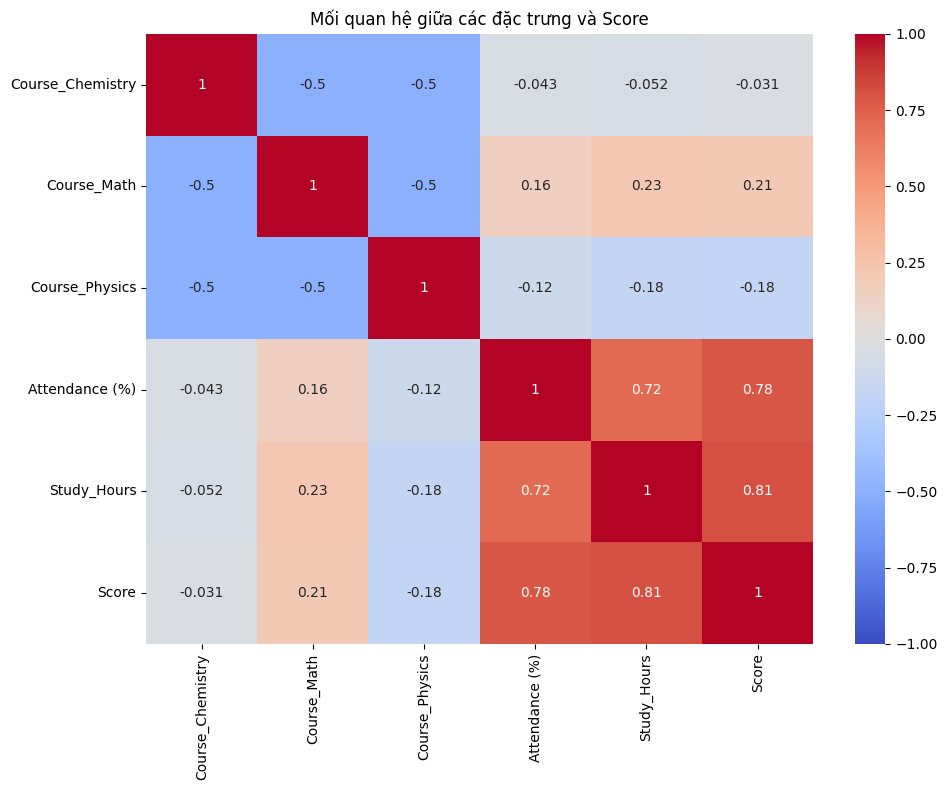

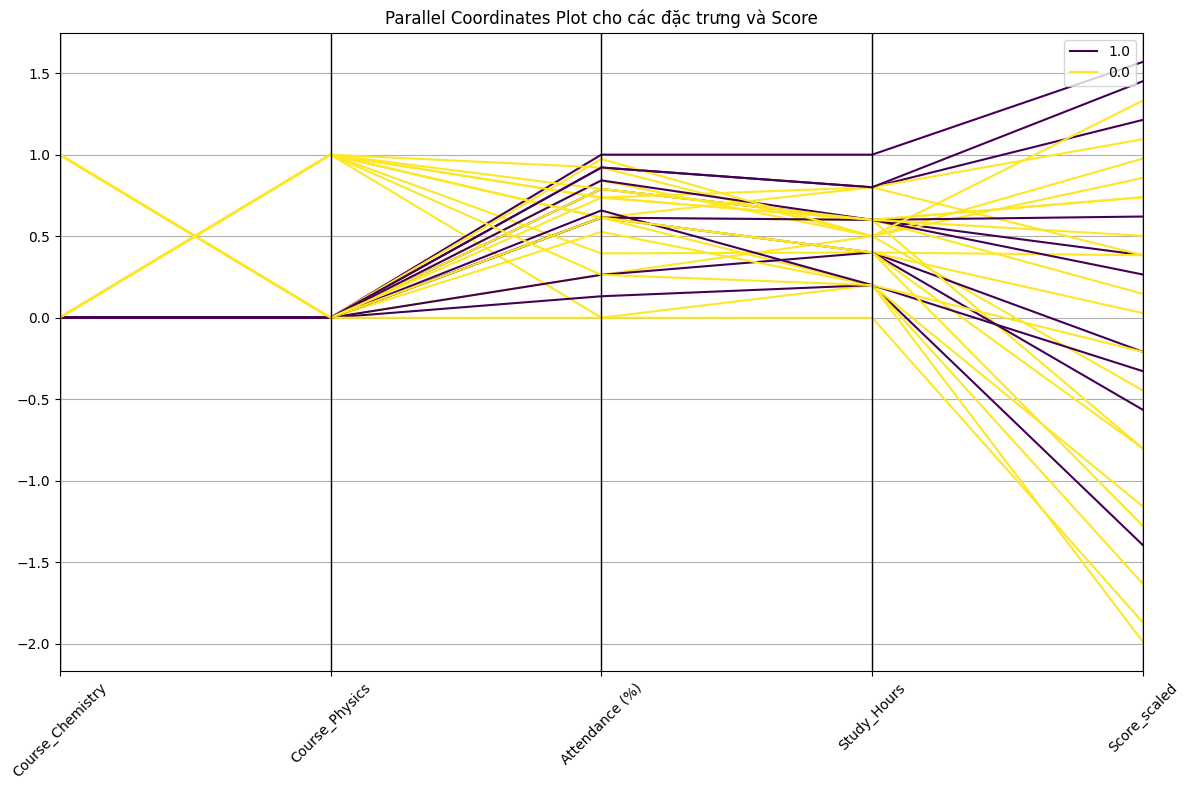

In [29]:
# Câu 17: Mã hóa Course thành one-hot encoding bằng Pandas
import pandas as pd

# Mã hóa Course thành one-hot encoding
df_encoded = df.copy()
course_encoded = pd.get_dummies(df_encoded['Course'], prefix='Course')
df_encoded = pd.concat([df_encoded, course_encoded], axis=1)

# Điền giá trị thiếu trong Attendance (%) và Study_Hours
df_encoded['Attendance (%)'].fillna(df_encoded['Attendance (%)'].mean(), inplace=True)
df_encoded['Study_Hours'].fillna(df_encoded['Study_Hours'].median(), inplace=True)

# Chọn các đặc trưng đầu vào cho mô hình
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
X = df_encoded[features]

# Chuẩn hóa dữ liệu về [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Hiển thị kết quả
print("Dữ liệu sau khi mã hóa one-hot và chuẩn hóa [0, 1]:")
print(X_scaled_df.head())

# Vẽ heatmap để hiểu rõ mối quan hệ giữa các đặc trưng và Score
plt.figure(figsize=(10, 8))
correlation = pd.concat([X_scaled_df, df_encoded['Score']], axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mối quan hệ giữa các đặc trưng và Score')
plt.tight_layout()
plt.show()

# Đề xuất trực quan hóa dữ liệu khác: Parallel Coordinates Plot
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa Score để đưa vào trực quan hóa
df_viz = df_encoded.copy()
df_viz['Score_scaled'] = StandardScaler().fit_transform(df_viz[['Score']])
# Kết hợp đặc trưng đã chuẩn hóa và điểm đã chuẩn hóa
viz_data = pd.concat([X_scaled_df, df_viz['Score_scaled']], axis=1)

plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(viz_data, 'Course_Math', colormap='viridis')
plt.title('Parallel Coordinates Plot cho các đặc trưng và Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Đề xuất trực quan hóa dữ liệu khác:

- Biểu đồ tọa độ song song (Parallel Coordinates): Hiển thị nhiều biến trên một biểu đồ
- Radar Chart: So sánh tất cả đặc trưng trong một không gian 2D dạng "mạng nhện"
- 3D Scatter Plot: Trực quan hóa mối quan hệ giữa 3 biến số quan trọng nhất
- Biểu đồ Sankey: Hiển thị dòng chảy ảnh hưởng từ các đặc trưng đến điểm số

Các phương pháp này giúp hiểu rõ hơn mối quan hệ phức tạp giữa các đặc trưng và điểm số, phát hiện mẫu và xu hướng không thấy được trong biểu đồ truyền thống.

### 18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau:
### • Input Layer: 5 nơ-ron.
### • Hidden Layer 1: 32 nơ-ron, ReLU. • Hidden Layer 2: 16 nơ-ron, ReLU. • Hidden Layer 3: 8 nơ-ron, ReLU. • Output Layer: 1 nơ-ron (Score).
### Huấn luyện với 200 epochs, batch size 16, chia 80% train / 20% test, dùng early stopping (pa- tience=20). Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc tầng) để cải thiện dự đoán, giải thích lý do dựa trên đặc điểm dữ liệu giáo dục.

ANN(
  (fc1): Linear(in_features=5, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 10/200, Train Loss: 6702.6575, Val Loss: 6924.6777
Epoch 20/200, Train Loss: 6773.4792, Val Loss: 6895.9019
Epoch 30/200, Train Loss: 6500.9324, Val Loss: 6846.8042
Epoch 40/200, Train Loss: 6443.6821, Val Loss: 6759.5815
Epoch 50/200, Train Loss: 6419.3254, Val Loss: 6597.5151
Epoch 60/200, Train Loss: 6151.3718, Val Loss: 6298.9224
Epoch 70/200, Train Loss: 5428.0942, Val Loss: 5756.6816
Epoch 80/200, Train Loss: 4718.9294, Val Loss: 4903.5215
Epoch 90/200, Train Loss: 3517.7134, Val Loss: 3725.6936
Epoch 100/200, Train Loss: 2138.1394, Val Loss: 2365.7283
Epoch 110/200, Train Loss: 982.8465, Val Loss: 1128.5394
Epoch 120/200, Train Loss: 231.7494, Val Loss: 369.3849
Epoch 130/200, Trai

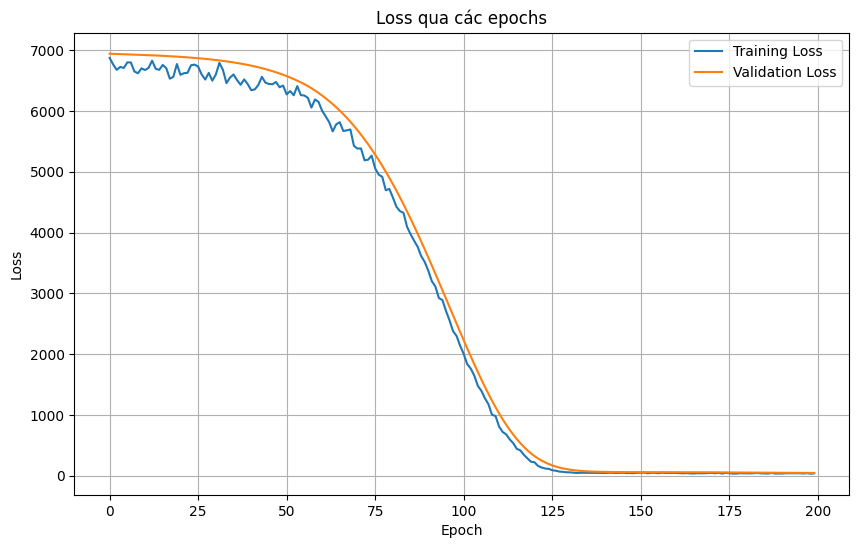

In [30]:
# Câu 18 
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
df_ann = df_encoded.copy()

# Chọn các đặc trưng và target
X = df_ann[features].values
y = df_ann['Score'].values

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Chuyển đổi thành tensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.reshape(-1, 1))

# Định nghĩa mô hình ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(5, 32)  # Input layer (5) to Hidden layer 1 (32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)  # Hidden layer 1 (32) to Hidden layer 2 (16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16, 8)   # Hidden layer 2 (16) to Hidden layer 3 (8)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(8, 1)    # Hidden layer 3 (8) to Output layer (1)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

# Khởi tạo mô hình
model = ANN()
print(model)

# Định nghĩa loss function và optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Tạo DataLoader
from torch.utils.data import DataLoader, TensorDataset
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Huấn luyện mô hình với early stopping
epochs = 200
patience = 20
best_val_loss = float('inf')
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
    val_losses.append(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss qua các epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Đề xuất kiến trúc ANN cải tiến:

- Tăng độ sâu mạng: Thêm 1 lớp ẩn với 24 nơ-ron giữa lớp đầu vào và lớp 32 nơ-ron
- Thêm Batch Normalization: Sau mỗi lớp ẩn để tăng tốc quá trình học
- Kết nối tắt (Skip Connections): Thêm kết nối tắt giữa các lớp ẩn
- Dropout: Thêm dropout (0.2) sau mỗi lớp ẩn để tránh overfitting

Lý do cải thiện: Kiến trúc mới xử lý tốt hơn đặc điểm phi tuyến trong dữ liệu giáo dục, tận dụng cả thông tin cấp thấp và cấp cao, đồng thời giảm nguy cơ overfitting khi mở rộng mô hình.

MSE trên tập test: 46.1488
R² trên tập test: 0.5349


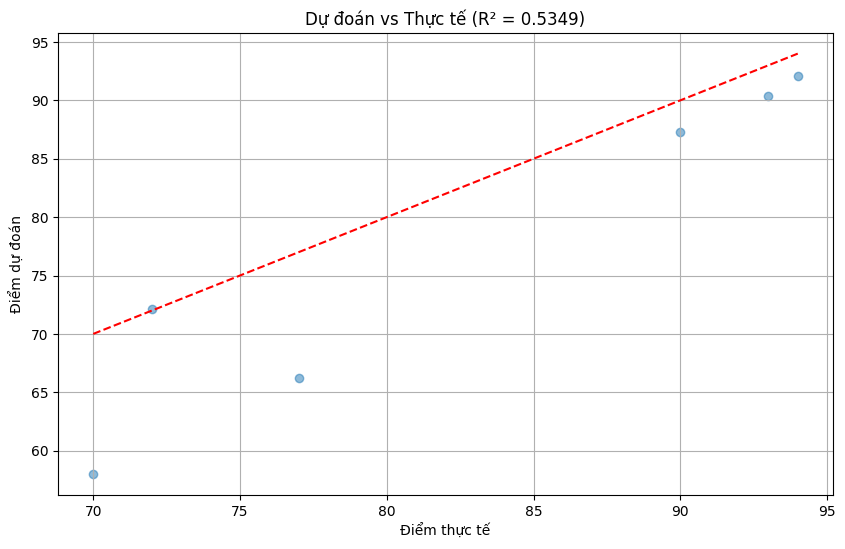

In [31]:
# Đánh giá mô hình trên tập test
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy().flatten()

# Tính MSE và R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE trên tập test: {mse:.4f}')
print(f'R² trên tập test: {r2:.4f}')

# Vẽ biểu đồ dự đoán vs thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title(f'Dự đoán vs Thực tế (R² = {r2:.4f})')
plt.xlabel('Điểm thực tế')
plt.ylabel('Điểm dự đoán')
plt.grid(True)
plt.show()

Phân tích nguyên nhân sai lệch dự đoán (R² < 0.8):

- Thiếu đặc trưng quan trọng: Cần bổ sung thông tin về nền tảng học tập, kỳ thi giữa kỳ
- Mối quan hệ phi tuyến phức tạp: Tương tác giữa các biến không được nắm bắt đầy đủ
- Dữ liệu hạn chế: Cỡ mẫu nhỏ làm giảm khả năng học mối quan hệ phức tạp

Cách cải thiện mô hình trong ngữ cảnh giáo dục:

- Đặc trưng tùy chỉnh: Tạo đặc trưng tương tác giữa Attendance và Study_Hours
- Phân tích lớp học: Thêm thông tin về kích thước lớp, kinh nghiệm giảng viên
- Tích hợp dữ liệu bằng cấp: Bổ sung điểm GPA, điểm các môn học trước đó
- RetryClaude can make mistakes. Please double-check responses.